In [53]:
#import packages
import tensorflow as tf
import numpy as np
import csv
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
import pandas as pd

In [54]:
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [93]:
df=pd.read_csv('/kaggle/input/deep-dta-data/dta_df (1).csv')

In [95]:
df.head()

,smiles,sequence,pKd
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532
1,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000
2,CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000
3,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000
4,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.920819


In [100]:
df['len_seq']=df['sequence'].apply(lambda x:len(x))
df['len_smiles']=df['smiles'].apply(lambda x:len(x))

In [101]:
df.head()

,smiles,sequence,pKd,len_seq,len_smiles
0,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532,961,51
1,CC1=C(C=C(C=C1)NC(=O)C2=CC=C(C=C2)CN3CCN(CC3)C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000,961,70
2,CC1=CC(=C(C=C1)F)NC(=O)NC2=CC=C(C=C2)C3=C4C(=C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000,961,57
3,CC(C)(C)C1=CC(=NO1)NC(=O)NC2=CC=C(C=C2)C3=CN4C...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.000000,961,77
4,CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,5.920819,961,54


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pKd', ylabel='Count'>

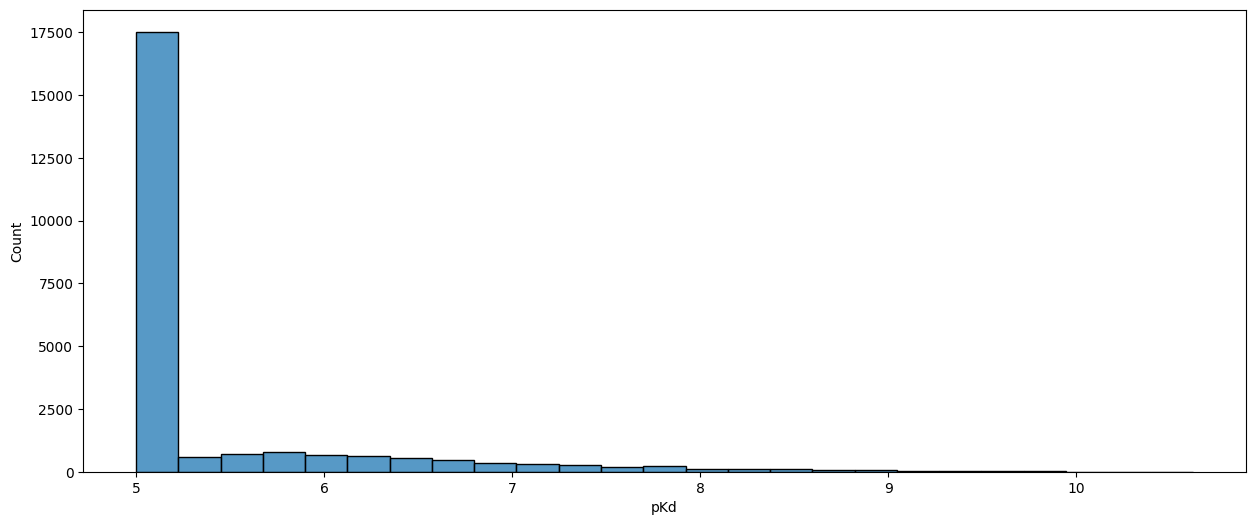

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.figure(figsize=(15,6))
# sns.histplot(df['pKd'],bins=25)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='pKd', ylabel='Count'>

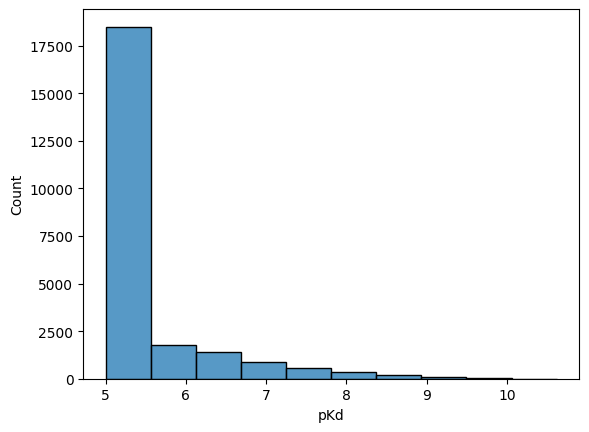

In [98]:
sns.histplot(df['pKd'],bins=10)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='len_seq', ylabel='Count'>

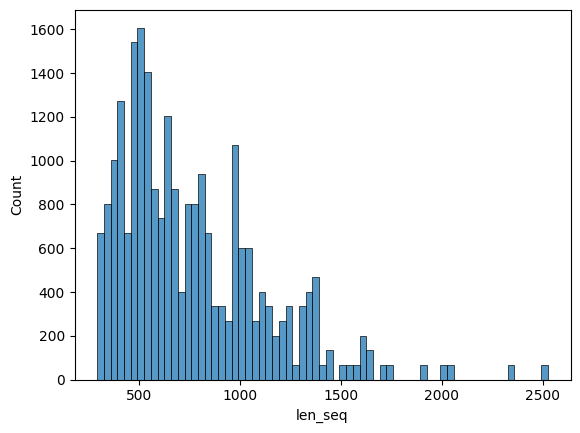

In [102]:
sns.histplot(df['len_seq'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='len_smiles', ylabel='Count'>

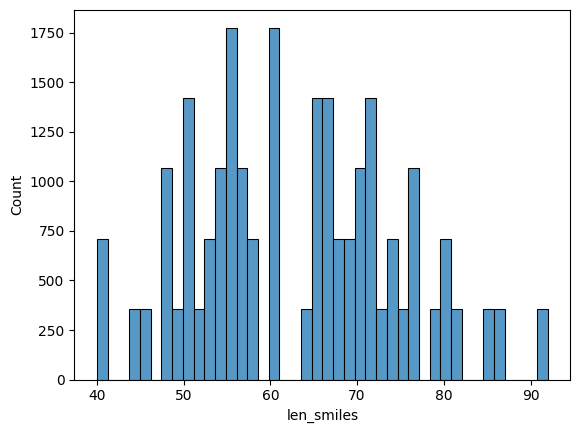

In [104]:
sns.histplot(df['len_smiles'])

In [55]:
data = []

with open('/kaggle/input/deep-dta-data/dta_df (1).csv') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row

    for row in reader:
        if len(row) >= 3:  # Check if the row has at least 3 columns
            triplet = [row[0], row[1], float(row[2])]
            data.append(triplet)
        else:
            print(f"Skipping row: {row} - Insufficient columns")

#data = len(data)

In [56]:
len(data)

23785

In [57]:
data[0]

['CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC=C4)N',
 'MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQVTVDEVLAEGGFAIVFLVRTSNGMKCALKRMFVNNEHDLQVCKREIQIMRDLSGHKNIVGYIDSSINNVSSGDVWEVLILMDFCRGGQVVNLMNQRLQTGFTENEVLQIFCDTCEAVARLHQCKTPIIHRDLKVENILLHDRGHYVLCDFGSATNKFQNPQTEGVNAVEDEIKKYTTLSYRAPEMVNLYSGKIITTKADIWALGCLLYKLCYFTLPFGESQVAICDGNFTIPDNSRYSQDMHCLIRYMLEPDPDKRPDIYQVSYFSFKLLKKECPIPNVQNSPIPAKLPEPVKASEAAAKKTQPKARLTDPIPTTETSIAPRQRPKAGQTQPNPGILPIQPALTPRKRATVQPPPQAAGSSNQPGLLASVPQPKPQAPPSQPLPQTQAKQPQAPPTPQQTPSTQAQGLPAQAQATPQHQQQLFLKQQQQQQQPPPAQQQPAGTFYQQQQAQTQQFQAVHPATQKPAIAQFPVVSQGGSQQQLMQNFYQQQQQQQQQQQQQQLATALHQQQLMTQQAALQQKPTMAAGQQPQPQPAAAPQPAPAQEPAIQAPVRQQPKVQTTPPPAVQGQKVGSLTPPSSPKTQRAGHRRILSDVTHSAVFGVPASKSTQLLQAAAAEASLNKSKSATTTPSGSPRTSQQNVYNPSEGSTWNPFDDDNFSKLTAEELLNKDFAKLGEGKHPEKLGGSAESLIPGFQSTQGDAFATTSFSAGTAEKRKGGQTVDSGLPLLSVSDPFIPLQVPDAPEKLIEGLKSPDTSLLLPDLLPMTDPFGSTSDAVIEKADVAVESLIPGLEPPVPQRLPSQTESVTSNRTDSLTGEDSLLDCSLLSNPTTDLLEEFAPTAISAPVHKAAEDSNLISGFDVPEGSDKVAEDEFDPIPVLITKNPQGGHSRNSSGSSE

In [58]:
# import random

# smiles = []
# proteins = []
# labels = []
# random.shuffle(data)  # Shuffle the data list

# for triplet in range(len(str(data))):
#     smiles.append(data[triplet][0])
#     proteins.append(data[triplet][1])
#     labels.append(data[triplet][2])

# import random

# smiles = []
# proteins = []
# labels = []

# # Wrap the data variable in a list
# data = [data]

# # Shuffle the data list
# random.shuffle(data)

# # Iterate over the data list and append the triplet elements to the corresponding lists
# for triplet in data:
#     smiles.append(triplet[0])
#     proteins.append(triplet[1])
#     labels.append(triplet[2])

import random

smiles = []
proteins = []
labels = []

# # Wrap the data variable in a list
# data = [data]

# Shuffle the data list
random.shuffle(data)

# Iterate over the data list and append the triplet elements to the corresponding lists
for triplet in range(len(data)):
    smiles.append(data[triplet][0])
    proteins.append(data[triplet][1])
    labels.append(data[triplet][2])

In [59]:
print(smiles[0])
print(proteins[1])
print(labels[2])

CS(=O)(=O)N1CCN(CC1)CC2=CC3=C(S2)C(=NC(=N3)C4=C5C=NNC5=CC=C4)N6CCOCC6
MQRDHTMDYKESCPSVSIPSSDEHREKKKRFTVYKVLVSVGRSEWFVFRRYAEFDKLYNTLKKQFPAMALKIPAKRIFGDNFDPDFIKQRRAGLNEFIQNLVRYPELYNHPDVRAFLQMDSPKHQSDPSEDEDERSSQKLHSTSQNINLGPSGNPHAKPTDFDFLKVIGKGSFGKVLLAKRKLDGKFYAVKVLQKKIVLNRKEQKHIMAERNVLLKNVKHPFLVGLHYSFQTTEKLYFVLDFVNGGELFFHLQRERSFPEHRARFYAAEIASALGYLHSIKIVYRDLKPENILLDSVGHVVLTDFGLCKEGIAISDTTTTFCGTPEYLAPEVIRKQPYDNTVDWWCLGAVLYEMLYGLPPFYCRDVAEMYDNILHKPLSLRPGVSLTAWSILEELLEKDRQNRLGAKEDFLEIQNHPFFESLSWADLVQKKIPPPFNPNVAGPDDIRNFDTAFTEETVPYSVCVSSDYSIVNASVLEADDAFVGFSYAPPSEDLFL
5.0


In [60]:
split=int(0.9*len(smiles))#90% training and 10% test
train_smiles=smiles[:split]
test_smiles=smiles[split:]
train_proteins=proteins[:split]
test_proteins=proteins[split:]
train_labels=labels[:split]
test_labels=labels[split:]

In [75]:
# Check the number of samples in your data
print(len(train_smiles), len(train_proteins), len(train_labels))
print(len(test_smiles), len(test_proteins), len(test_labels))

21406 21406 21406
2379 2379 2379


## **Model Building**

In [80]:
#Tokenize smiles
tokenizer_smiles=Tokenizer(char_level=True)
tokenizer_smiles.fit_on_texts(train_smiles)

word_index_smiles=tokenizer_smiles.word_index
vocab_size_smiles=len(word_index_smiles)

train_sequence_smiles=tokenizer_smiles.texts_to_sequences(train_smiles)
train_padded_smiles=pad_sequences(train_sequence_smiles,truncating='post',padding='post',maxlen=85)

test_sequence_smiles=tokenizer_smiles.texts_to_sequences(test_smiles)
test_padded_smiles=pad_sequences(test_sequence_smiles,truncating='post',padding='post',maxlen=85)




In [76]:
#Tokenize proteins
tokenizer_proteins=Tokenizer(char_level=True)
tokenizer_proteins.fit_on_texts(train_proteins)

word_index_proteins=tokenizer_proteins.word_index
vocab_size_proteins=len(word_index_proteins)

train_sequence_proteins=tokenizer_smiles.texts_to_sequences(train_proteins)
train_padded_proteins=pad_sequences(train_sequence_proteins,truncating='post',padding='post',maxlen=1200)

test_sequence_proteins=tokenizer_smiles.texts_to_sequences(test_proteins)
test_padded_proteins=pad_sequences(test_sequence_proteins,truncating='post',padding='post',maxlen=1200)

In [77]:
print(vocab_size_smiles)
print(vocab_size_proteins)

22
20


In [81]:
#Convert to numpy arrays and check dimensions.
train_smiles_array=np.array(train_padded_smiles)
test_smiles_array=np.array(test_padded_smiles)

train_proteins_array=np.array(train_padded_proteins)
test_proteins_array=np.array(test_padded_proteins)

train_labels_array=np.array(train_labels,dtype='float32')
test_labels_array=np.array(test_labels,dtype='float32')




In [82]:
print(len(train_smiles_array), len(train_proteins_array), len(train_labels_array))
print(len(test_smiles_array), len(test_proteins_array), len(test_labels_array))

21406 21406 21406
2379 2379 2379


## **Deep DTA model**

In [83]:
from keras.layers import Input,Embedding,Concatenate,Conv1D,GlobalMaxPooling1D,Dense,Dropout
from keras.models import Model

#Define two input layers
smile_input=Input((85,))
protein_input=Input((1200,))

#smiles encoder
embed_smiles=Embedding(vocab_size_smiles+1,128,input_length=85)(smile_input)
conv_smiles=Conv1D(32,4,activation='relu')(embed_smiles)
conv_smiles=Conv1D(64,6,activation='relu')(conv_smiles)
conv_smiles=Conv1D(96,8,activation='relu')(conv_smiles)
max_smiles = GlobalMaxPooling1D()(conv_smiles)  # Fix here
#flat_smiles=Flatten(max_smiles)

#protein encoder
embed_protein=Embedding(vocab_size_proteins+1,128,input_length=1200)(protein_input)
conv_protein=Conv1D(32,4,activation='relu')(embed_protein)
conv_protein=Conv1D(64,8,activation='relu')(conv_protein)
conv_protein=Conv1D(96,12,activation='relu')(conv_protein)
max_protein = GlobalMaxPooling1D()(conv_protein)  # Fix here
#flat_protein=Flatten(max_protein)

#concatenate the two encoder outputs
concat_layer=Concatenate()([max_smiles,max_protein])

#decoder
output=Dense(1024,activation='relu')(concat_layer)
output=Dropout(0.1)(output)
output=Dense(1024,activation='relu')(output)
output=Dropout(0.1)(output)
output=Dense(512,activation='relu')(output)
output=Dense(1)(output)

#define a model with a list of two inputs
model=Model(inputs=[smile_input,protein_input],outputs=output)


In [84]:
#compile model
optimizer=optimizers.Adam(learning_rate=0.001)
model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])


In [85]:
#visualize model
tf.keras.utils.plot_model(model)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 85)]                 0         []                            
                                                                                                  
 input_16 (InputLayer)       [(None, 1200)]               0         []                            
                                                                                                  
 embedding_10 (Embedding)    (None, 85, 128)              2944      ['input_15[0][0]']            
                                                                                                  
 embedding_11 (Embedding)    (None, 1200, 128)            2688      ['input_16[0][0]']            
                                                                                            

In [86]:
print(len(train_smiles_array), len(train_proteins_array), len(train_labels_array))
print(len(test_smiles_array), len(test_proteins_array), len(test_labels_array))

21406 21406 21406
2379 2379 2379


In [87]:
train_labels_array = train_labels_array[:len(train_smiles_array)]
test_labels_array = test_labels_array[:len(test_smiles_array)]

In [88]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,  # minimum amount of change to count as an improvement
    patience=10,  # how many epochs to wait before stopping
    restore_best_weights=True,
)

history = model.fit(
    [train_smiles_array, train_proteins_array],
    train_labels_array,
    epochs=100,
    batch_size=256,
    validation_data=([test_smiles_array, test_proteins_array], test_labels_array),  # Corrected here
    callbacks=[early_stopping]  # You can include the early stopping callback here
)

Epoch 1/100
84/84 [==============================] - 12s 95ms/step - loss: 2.5147 - mse: 2.5147 - val_loss: 0.5517 - val_mse: 0.5517
Epoch 2/100
84/84 [==============================] - 7s 85ms/step - loss: 0.5178 - mse: 0.5178 - val_loss: 0.5026 - val_mse: 0.5026
Epoch 3/100
84/84 [==============================] - 7s 86ms/step - loss: 0.4903 - mse: 0.4903 - val_loss: 0.5126 - val_mse: 0.5126
Epoch 4/100
84/84 [==============================] - 7s 87ms/step - loss: 0.4800 - mse: 0.4800 - val_loss: 0.4732 - val_mse: 0.4732
Epoch 5/100
84/84 [==============================] - 7s 88ms/step - loss: 0.4721 - mse: 0.4721 - val_loss: 0.4862 - val_mse: 0.4862
Epoch 6/100
84/84 [==============================] - 7s 88ms/step - loss: 0.4668 - mse: 0.4668 - val_loss: 0.4765 - val_mse: 0.4765
Epoch 7/100
84/84 [==============================] - 7s 89ms/step - loss: 0.4570 - mse: 0.4570 - val_loss: 0.4777 - val_mse: 0.4777
Epoch 8/100
84/84 [==============================] - 7s 88ms/step - loss: 0

<Figure size 640x480 with 0 Axes>

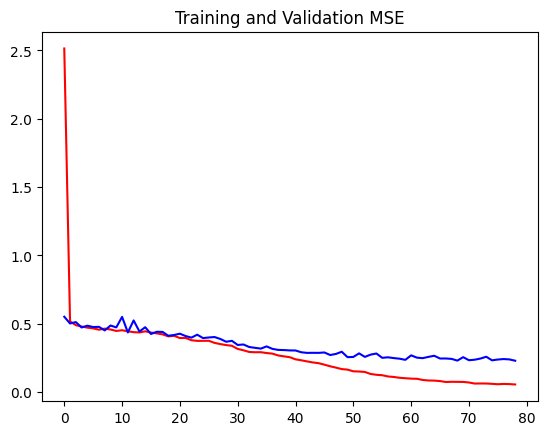

<Figure size 640x480 with 0 Axes>

In [89]:
import matplotlib.pyplot as plt

mse=history.history['mse']
val_mse=history.history['val_mse']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(mse))

plt.plot(epochs,mse,'r')
plt.plot(epochs,val_mse,'b')
plt.title('Training and Validation MSE')

plt.figure()

In [90]:
#save model
model.save('deepDTA')